In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


loading the train dataset

In [2]:
import pandas as pd
o=pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
c=o.copy()
o.head()



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


Exploratory Data Analysis

In [3]:
print(o.shape)
print(o.columns)

(116023, 52)
Index(['trafficSource.isTrueDirect', 'purchaseValue', 'browser',
       'device.screenResolution', 'trafficSource.adContent',
       'trafficSource.keyword', 'screenSize', 'geoCluster',
       'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding',
       'device.mobileInputSelector', 'userId', 'trafficSource.campaign',
       'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain',
       'gclIdPresent', 'device.operatingSystemVersion', 'sessionNumber',
       'device.flashVersion', 'geoNetwork.region', 'trafficSource',
       'totals.visits', 'geoNetwork.networkLocation', 'sessionId', 'os',
       'geoNetwork.subContinent', 'trafficSource.medium',
       'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor',
       'locationCountry', 'device.browserSize',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'trafficSource.adwordsClickInfo.page',
       'geoNetwork.metro', 'pageViews', 'location

In [4]:
o.describe()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


In [5]:

(o['purchaseValue'] == 0).sum()

92038

In [6]:
o.nunique()

trafficSource.isTrueDirect                           1
purchaseValue                                     6766
browser                                             34
device.screenResolution                              1
trafficSource.adContent                             53
trafficSource.keyword                              566
screenSize                                           1
geoCluster                                           5
trafficSource.adwordsClickInfo.slot                  3
device.mobileDeviceBranding                          1
device.mobileInputSelector                           1
userId                                          100499
trafficSource.campaign                              28
device.mobileDeviceMarketingName                     1
geoNetwork.networkDomain                             3
gclIdPresent                                         2
device.operatingSystemVersion                        1
sessionNumber                                      230
device.fla

In [7]:
o.isnull().sum()

trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                                        0
device.fla

In [8]:
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [9]:

o.corr(numeric_only=True)['purchaseValue'].sort_values(ascending=False)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


purchaseValue                          1.000000
totalHits                              0.251651
pageViews                              0.248454
sessionNumber                          0.230585
userId                                -0.003469
gclIdPresent                          -0.005652
date                                  -0.010338
sessionStart                          -0.018537
sessionId                             -0.018537
trafficSource.adwordsClickInfo.page   -0.025839
device.isMobile                       -0.064042
totals.visits                               NaN
locationZone                                NaN
totals.bounces                              NaN
new_visits                                  NaN
Name: purchaseValue, dtype: float64

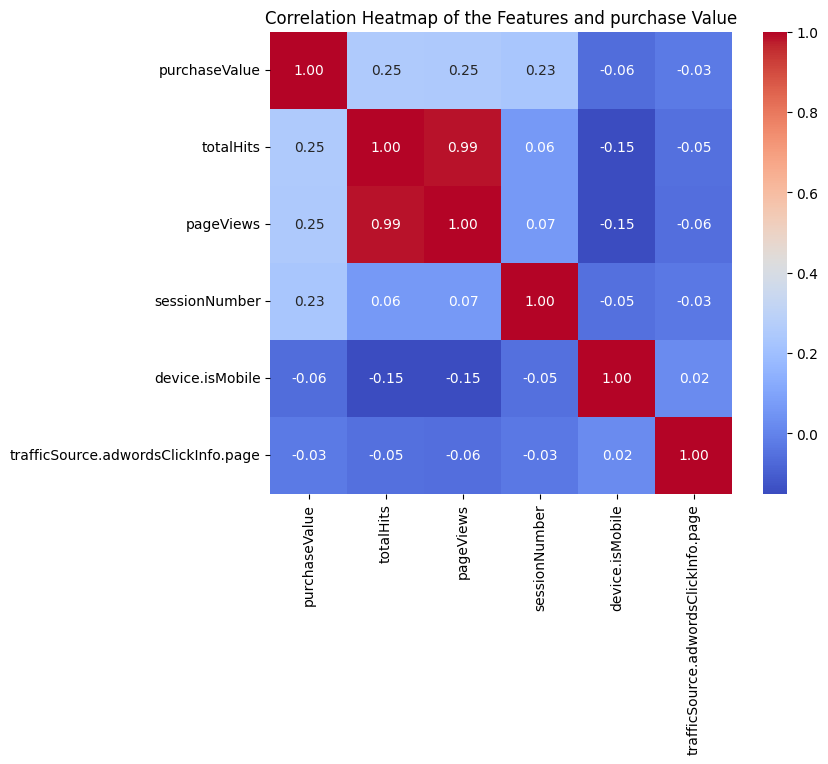

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = o.corr(numeric_only=True)
target_corr = corr_matrix['purchaseValue'].abs().sort_values(ascending=False)
top_cols = target_corr.head(6).index.tolist()



plt.figure(figsize=(8, 6))
sns.heatmap(o[top_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of the Features and purchase Value')
plt.show()


/tmp/ipykernel_13/1578824050.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='purchaseValue', data=o, ci=None)


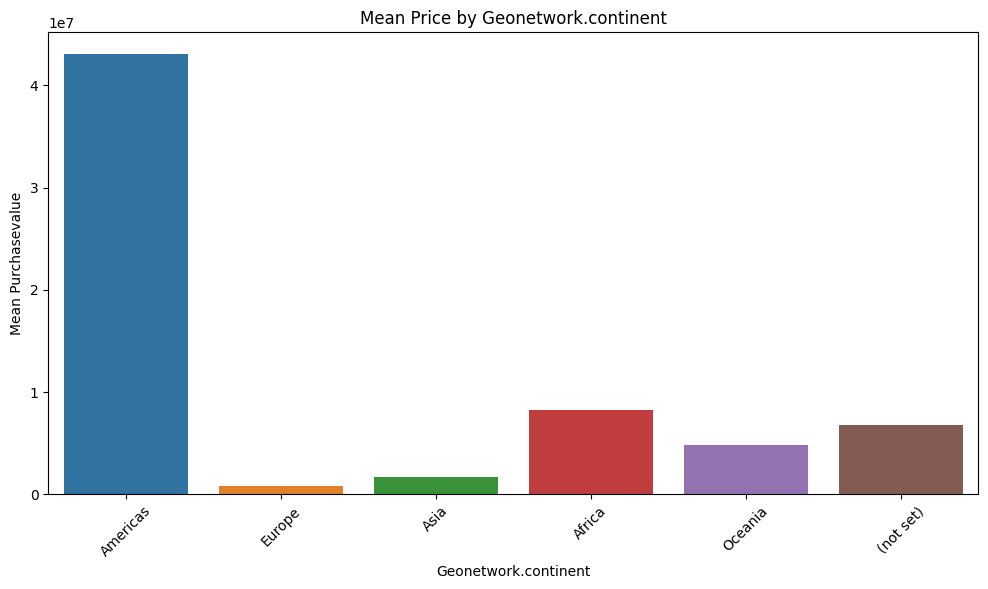

/tmp/ipykernel_13/1578824050.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='purchaseValue', data=o, ci=None)


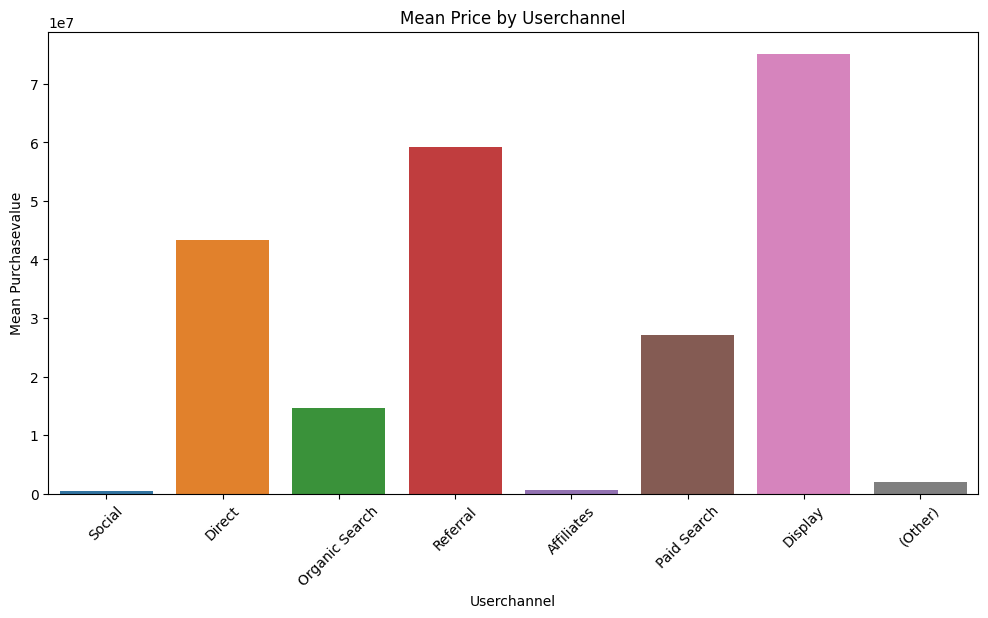

/tmp/ipykernel_13/1578824050.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='purchaseValue', data=o, ci=None)


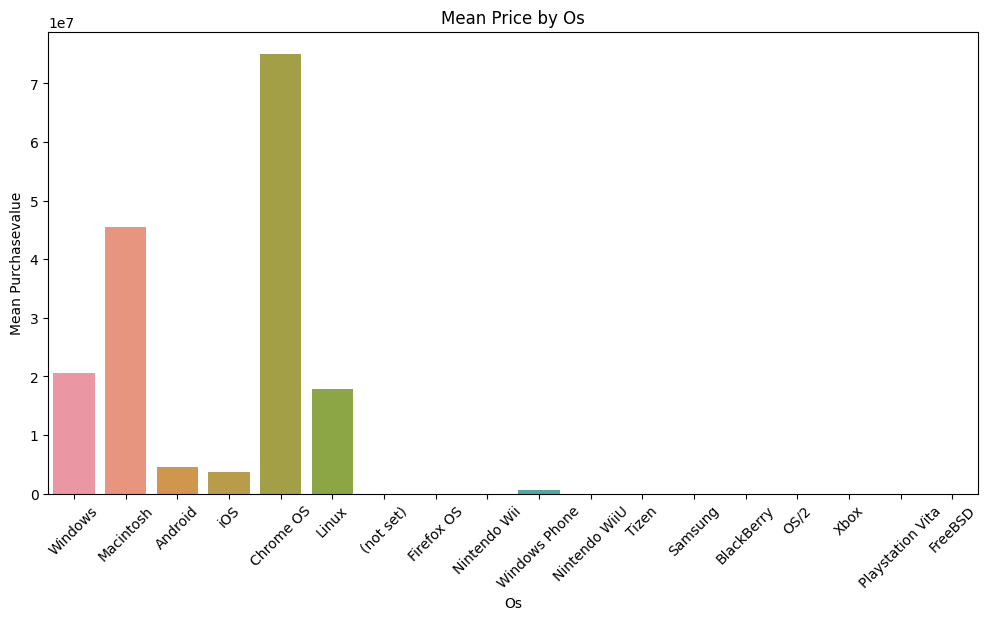

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
cat_cols = [
    'geoNetwork.continent',
    'userChannel',
    'os']
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=col, y='purchaseValue', data=o, ci=None)
    plt.title(f'Mean Price by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Mean Purchasevalue')
    plt.xticks(rotation=45)
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


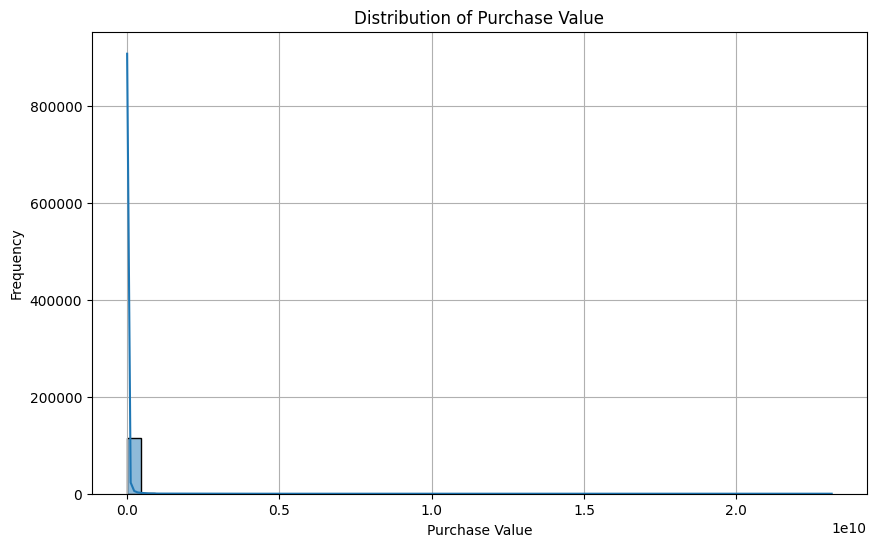

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(o['purchaseValue'], bins=50, kde=True)
plt.title("Distribution of Purchase Value")
plt.xlabel("Purchase Value")
plt.ylabel("Frequency")

plt.grid(True)
plt.show()

here  are the codes for 4 of the 5 milestones 

In [13]:
'''#-------------------------------------------------------milestone1----------------------------------------------------------

fil = o[o['totals.bounces'] != 1]
q1 = fil[['pageViews', 'purchaseValue']]
cor = q1.corr().loc['pageViews', 'purchaseValue']
print("q1-",cor)

#-----------------------------------------------------------

q2=o[['geoNetwork.continent','totalHits']]
h2=q2.groupby('geoNetwork.continent')['totalHits'].mean().idxmax()
print("q2-",h2)

#--------------------------------------------------------------------------

q3=o[['trafficSource.medium','purchaseValue']]
q3 = q3[q3['purchaseValue'] > 0]
h=q3.groupby('trafficSource.medium')['purchaseValue'].count().idxmax()
print("answer q3",h)

#----------------------------------------------------------------------------

q4=o[['os','browser','purchaseValue']]
q4=q4[q4['purchaseValue']>0]
q4.head()
q4a = q4.groupby(['os', 'browser']).size().idxmax()
print("q4-ans-",q4a)

#------------------------------------------------------------------------------------

q5 = o[['totalHits', 'purchaseValue']]
pur = q5[q5['purchaseValue'] > 0]
npur = q5[q5['purchaseValue'] == 0]
pav = pur['totalHits'].mean()
nav = npur['totalHits'].mean()
r = pav / nav
print("q5 ans-",r)

#-------------------------------------------------------------------------------

q6=o[['trafficSource.medium','purchaseValue']]
q6=q6.groupby('trafficSource.medium')['purchaseValue'].count()
org=q6['organic']
q6a=q6['organic']/q6.sum()
print("q6 answer-",q6a)

#-----------------------------------------------------------------------------

q7 = o[['trafficSource.referralPath','purchaseValue']]
q7 = q7[q7['purchaseValue']>0]
q7a=q7.groupby('trafficSource.referralPath').count().idxmax()
print("q7-",q7a)

#------------------------------------------------------------------------------------
q8 = o[['os', 'purchaseValue']]
avg_purchase = q8.groupby('os')['purchaseValue'].mean()
top_os = avg_purchase.idxmax()
top_value = avg_purchase.max()
print(avg_purchase)
print("💻 OS with highest avg. purchaseValue:", top_os)
print("💰 Average purchaseValue:", round(top_value, 2))
  
#------------------------------------------------------

total_sessions = len(o)  # total number of sessions (rows)
unique_users = o['userId'].nunique()  # count of unique users
average_sessions_per_user = total_sessions / unique_users
print("q9-",average_sessions_per_user)

#----------------------------------------------------------

unique_users = o['userId'].nunique()
print("q10-",unique_users) '''

'#-------------------------------------------------------milestone1----------------------------------------------------------\n\nfil = o[o[\'totals.bounces\'] != 1]\nq1 = fil[[\'pageViews\', \'purchaseValue\']]\ncor = q1.corr().loc[\'pageViews\', \'purchaseValue\']\nprint("q1-",cor)\n\n#-----------------------------------------------------------\n\nq2=o[[\'geoNetwork.continent\',\'totalHits\']]\nh2=q2.groupby(\'geoNetwork.continent\')[\'totalHits\'].mean().idxmax()\nprint("q2-",h2)\n\n#--------------------------------------------------------------------------\n\nq3=o[[\'trafficSource.medium\',\'purchaseValue\']]\nq3 = q3[q3[\'purchaseValue\'] > 0]\nh=q3.groupby(\'trafficSource.medium\')[\'purchaseValue\'].count().idxmax()\nprint("answer q3",h)\n\n#----------------------------------------------------------------------------\n\nq4=o[[\'os\',\'browser\',\'purchaseValue\']]\nq4=q4[q4[\'purchaseValue\']>0]\nq4.head()\nq4a = q4.groupby([\'os\', \'browser\']).size().idxmax()\nprint("q4-ans-",

In [14]:
'''#---------------------------------------------------milestone 2------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


o2 = o.copy()


df = o2[~o2['totalHits'].isnull()]

# Plot distribution (zoomed in to show skew)
plt.figure(figsize=(10, 6))
sns.histplot(df['totalHits'], bins=100, kde=True)
plt.xlim(0, 100)  
plt.title('Distribution of totalHits')
plt.xlabel('totalHits')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Skewness of totalHits:", df['totalHits'].skew())

#---------------------------------------------------------------------------

q2 = o2[['device.isMobile', 'pageViews', 'purchaseValue']].dropna()
mobile_users = q2[q2['device.isMobile'] == True]
correlation = mobile_users['pageViews'].corr(mobile_users['purchaseValue'])
print("Correlation coefficient (mobile only):", correlation)

#----------------------------------------------------------------------------------

o2['is_purchase'] = o2['purchaseValue'] > 0

#-------------------------------------------------------------------------------------
total_purchases = o2['is_purchase'].sum()
print("Total purchase records in dataset:", total_purchases)
train, val = train_test_split(
    o2,
    test_size=0.3,
    stratify=o2['is_purchase'],
    random_state=42
)
train_purchases = train['is_purchase'].sum()
val_purchases = val['is_purchase'].sum()

print("Purchases in training set:", train_purchases)
print("Purchases in validation set:", val_purchases)

print("Validation set purchase ratio:", round(val_purchases / total_purchases, 4))

#------------------------------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
purchase_values = o2[['purchaseValue']].dropna()
scaler = StandardScaler()
normalized_values = scaler.fit_transform(purchase_values)
import numpy as np
std_dev = np.std(normalized_values)
print("Standard deviation after normalization:", round(std_dev, 2))

#-----------------------------------------------------------------------

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

cols = ['purchaseValue', 'totalHits', 'pageViews']
df = o2[cols].dropna()
X = df[['totalHits', 'pageViews']]
y = df['purchaseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print(coef_df)

#-----------------------------------------------------------------------

total_rows = len(o2)
missing_bounces = o2['totals.bounces'].isna().sum()
missing_percentage = (missing_bounces / total_rows) * 100
print(f"Missing values in 'totals.bounces': {missing_percentage:.2f}%")
'''

'#---------------------------------------------------milestone 2------------------------------------------------------------\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.model_selection import train_test_split\n\n\no2 = o.copy()\n\n\ndf = o2[~o2[\'totalHits\'].isnull()]\n\n# Plot distribution (zoomed in to show skew)\nplt.figure(figsize=(10, 6))\nsns.histplot(df[\'totalHits\'], bins=100, kde=True)\nplt.xlim(0, 100)  \nplt.title(\'Distribution of totalHits\')\nplt.xlabel(\'totalHits\')\nplt.ylabel(\'Frequency\')\nplt.grid(True)\nplt.show()\n\nprint("Skewness of totalHits:", df[\'totalHits\'].skew())\n\n#---------------------------------------------------------------------------\n\nq2 = o2[[\'device.isMobile\', \'pageViews\', \'purchaseValue\']].dropna()\nmobile_users = q2[q2[\'device.isMobile\'] == True]\ncorrelation = mobile_users[\'pageViews\'].corr(mobile_users[\'purchaseValue\'])\nprint("Correlation coefficient (mobile only):", correlati

In [15]:
#-----------------------------------milestone 3------------------------------------------------------------------

In [16]:
'''#----------------------------------------------milestone 4------------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

def preprocess(df):
   
    X = df.drop(columns=['purchaseValue'])
    y = df['purchaseValue']

    
    X = X.copy()
    for col in X.select_dtypes(include=['bool']).columns:
        X[col] = X[col].astype(int)

    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=39)
    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

    
    num_imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()

    X_train_num = num_imputer.fit_transform(X_train[num_cols])
    X_val_num = num_imputer.transform(X_val[num_cols])
    X_train_num = scaler.fit_transform(X_train_num)
    X_val_num = scaler.transform(X_val_num)
    X_train_num = np.round(X_train_num, 3)
    X_val_num = np.round(X_val_num, 3)

 
    cat_imputer = SimpleImputer(strategy='most_frequent')

    X_train_cat = cat_imputer.fit_transform(X_train[cat_cols])
    X_val_cat = cat_imputer.transform(X_val[cat_cols])
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X_train_cat = encoder.fit_transform(X_train_cat)
    X_val_cat = encoder.transform(X_val_cat)

    
    X_train_processed = np.hstack([X_train_num, X_train_cat])
    X_val_processed = np.hstack([X_val_num, X_val_cat])

    return (
        X_train_processed,
        X_val_processed,
        y_train.values,
        y_val.values,
        num_cols,
        cat_cols,
        encoder,
        scaler,
        num_imputer,
        cat_imputer
    )

#-----------------------------------------mlp regressor-------------------------------------------------    
from sklearn.neural_network import MLPRegressor

X_train_p, X_val_p, y_train_p, y_val_p, num_cols, cat_cols, encoder, scaler, num_imp, cat_imp = preprocess(o)

mlp = MLPRegressor(hidden_layer_sizes=(5, 3), random_state=39, max_iter=1000)  # max_iter increased to ensure convergence
mlp.fit(X_train_p, y_train_p)
train_score = mlp.score(X_train_p, y_train_p)
val_score = mlp.score(X_val_p, y_val_p)

print(f"Training score (R²): {train_score:.4f}")
print(f"Test/Validation score (R²): {val_score:.4f}")


#------------------------------------------------linear regression+gbregressor------------------------------

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor

lin_reg = LinearRegression()
gb_reg = GradientBoostingRegressor(random_state=39)
voting_reg = VotingRegressor(estimators=[
    ('lr', lin_reg),
    ('gb', gb_reg)
])
voting_reg.fit(X_train_p, y_train_p)


train_score_vr1 = voting_reg.score(X_train_p, y_train_p)
val_score_vr1 = voting_reg.score(X_val_p, y_val_p)
print(f"Test/Validation score (VotingRegressor with Linear + GB): {val_score_vr1:.4f}")
print(f"Train score (VotingRegressor with Linear + GB): {train_score_vr1:.4f}")

#-------------------------------------------------- Ridge + GB ----------------------------------------
ridge_reg = Ridge(random_state=39)
voting_reg2 = VotingRegressor(estimators=[
    ('ridge', ridge_reg),
    ('gb', gb_reg)
])
voting_reg2.fit(X_train_p, y_train_p)


train_score_vr2 = voting_reg2.score(X_train_p, y_train_p)
val_score_vr2 = voting_reg2.score(X_val_p, y_val_p)
print(f"Test/Validation score (VotingRegressor with Ridge + GB): {val_score_vr2:.4f}")
print(f"Train score (VotingRegressor with Ridge + GB): {train_score_vr2:.4f}")'''

'#----------------------------------------------milestone 4------------------------------------------------------------------\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import OneHotEncoder, StandardScaler\nfrom sklearn.impute import SimpleImputer\n\ndef preprocess(df):\n   \n    X = df.drop(columns=[\'purchaseValue\'])\n    y = df[\'purchaseValue\']\n\n    \n    X = X.copy()\n    for col in X.select_dtypes(include=[\'bool\']).columns:\n        X[col] = X[col].astype(int)\n\n    \n    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=39)\n    num_cols = X_train.select_dtypes(include=[\'int64\', \'float64\']).columns\n    cat_cols = X_train.select_dtypes(include=[\'object\', \'category\']).columns\n\n    \n    num_imputer = SimpleImputer(strategy=\'mean\')\n    scaler = StandardScaler()\n\n    X_train_num = num_imputer.fit_transform(X_train[num_cols])\n    X_val_num = num_im

In [17]:
'''-----------------------------------------------milkestone5--------------------------------------------------------
df=c.copy()
t=0.7
mis=df.isna().mean()
drop=mis[mis>t].index
df=df.drop(columns=drop)
print(df.shape)
df=df.drop(columns=['sessionId','userId'])
print(df.shape)

from sklearn.model_selection import train_test_split
df['purchaseValue'] = df['purchaseValue'].fillna(0)

x = df.drop(columns=['purchaseValue'])
y = df['purchaseValue']

xt,xv,yt,yv=train_test_split(x,y,test_size=0.2,random_state=42)
print(xt.shape)
print(xv.shape)
print(yt.shape)


from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

num = xt.select_dtypes(include=[np.number]).columns.tolist()
cat = xt.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()


# Train set
for col in num:
    xt[col] = xt[col].fillna(xt[col].median())
for col in cat:
    xt[col] = xt[col].fillna(xt[col].mode()[0]).astype(str)


for col in num:
    xv[col] = xv[col].fillna(xt[col].median())
for col in cat:
    xv[col] = xv[col].fillna(xt[col].mode()[0]).astype(str)


lb_dict = {}
most_frequent = xt[cat].mode().iloc[0]

for col in cat:
    lb = LabelEncoder()
    xt[col] = lb.fit_transform(xt[col])
    lb_dict[col] = lb

    
    xv[col] = xv[col].apply(lambda x: x if x in lb.classes_ else most_frequent[col])
    
    
    unseen = set(xv[col]) - set(lb.classes_)
    if unseen:
        lb.classes_ = np.append(lb.classes_, list(unseen))

    xv[col] = lb.transform(xv[col])


s = StandardScaler()
xt[num] = s.fit_transform(xt[num])
xv[num] = s.transform(xv[num])



print("Total features after Label Encoding:", xt.shape[1])
print("Mean of first scaled feature:", xt.iloc[:, 0].mean())
print("Std of first scaled feature:", xt.iloc[:, 0].std())



from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42)
}
from sklearn.metrics import mean_squared_error, mean_absolute_error
for name, model in models.items():
    model.fit(xt, yt)
    preds = model.predict(xv)
    score = r2_score(yv, preds)
    print(f"{name} R² score on test set: {score:.4f}")
    mse = mean_squared_error(yv, preds)
    mae = mean_absolute_error(yv, preds)

    print("Mean Squared Error  model:", mse)
    print("Mean Absolute Error model:", mae)

'''

'-----------------------------------------------milkestone5--------------------------------------------------------\ndf=c.copy()\nt=0.7\nmis=df.isna().mean()\ndrop=mis[mis>t].index\ndf=df.drop(columns=drop)\nprint(df.shape)\ndf=df.drop(columns=[\'sessionId\',\'userId\'])\nprint(df.shape)\n\nfrom sklearn.model_selection import train_test_split\ndf[\'purchaseValue\'] = df[\'purchaseValue\'].fillna(0)\n\nx = df.drop(columns=[\'purchaseValue\'])\ny = df[\'purchaseValue\']\n\nxt,xv,yt,yv=train_test_split(x,y,test_size=0.2,random_state=42)\nprint(xt.shape)\nprint(xv.shape)\nprint(yt.shape)\n\n\nfrom sklearn.preprocessing import LabelEncoder, StandardScaler\nimport numpy as np\n\nnum = xt.select_dtypes(include=[np.number]).columns.tolist()\ncat = xt.select_dtypes(include=[\'object\', \'bool\', \'category\']).columns.tolist()\n\n\n# Train set\nfor col in num:\n    xt[col] = xt[col].fillna(xt[col].median())\nfor col in cat:\n    xt[col] = xt[col].fillna(xt[col].mode()[0]).astype(str)\n\n\nfor c

In [18]:
data=o[[
    'geoNetwork.city',
    'userId',
    'sessionId',
    'userChannel',
    'trafficSource',
    'date',
    'sessionNumber',
    'totalHits',
    'pageViews'
]].isna().sum()
print(data)

geoNetwork.city    0
userId             0
sessionId          0
userChannel        0
trafficSource      0
date               0
sessionNumber      0
totalHits          0
pageViews          8
dtype: int64


In [19]:
print("Min purchaseValue in target:", o['purchaseValue'].min())


Min purchaseValue in target: 0.0


**Preprocess function**


* for preprocessing function i didnt follow the pipeline structure at first then implemented it  through using pipeline which is an effective strategy for preprocessing and traing that avoids data leakage ,

*  in preprocessing pipeline it begane   segeregating of numeic and categorical values and then for imputing of missing values i used mean for numeic columns and mode for categorical columns
*  after that the categorical column were ordinally encoded and the encoder function data was stored as well
*  after this function i scaled the numeric features using standard scaler 

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Defining numeric and categorical columns
df = c.copy()
df = df.dropna(subset=['purchaseValue'])
y_final = df['purchaseValue']

cat_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).drop(columns=['purchaseValue']).columns.tolist()



initial_preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ]), cat_cols)
], remainder='drop')  



def feature_engineering(df):
   
    df = pd.DataFrame(df, columns=num_cols + cat_cols)

    df['pageViews_per_session'] = df['pageViews'] / (df['sessionNumber'] + 1)
    df['log_pageViews'] = np.log1p(df['pageViews'])
    df['pageViews_to_totalHits'] = df['pageViews'] / (df['totalHits'] + 1)
    df['totalHits_per_session'] = df['totalHits'] / (df['sessionNumber'] + 1)
    df['interaction_pageHits'] = df['pageViews'] * df['totalHits']

    return df



def scale_selected_cols(X):
    df = X.copy()
    df[num_cols] = scaler.transform(df[num_cols])  
    return df


scaler = StandardScaler()
scaler.fit(df[num_cols])


full_pipeline = Pipeline([
    ('initial_preprocess', initial_preprocessor),                
    ('feature_engineering', FunctionTransformer(feature_engineering, validate=False)),  
    ('scale_numeric', FunctionTransformer(scale_selected_cols, validate=False))  ])       

i have selected this top 14 featuires beasue of a series of fine tuning finding each feature's importance and then try error method to find best n features  

In [21]:
important_feats = [
    'pageViews_per_session',
    'totalHits_per_session',
    'geoNetwork.city',
    'interaction_pageHits',
    'userId',
    'sessionId',
    'userChannel',
    'pageViews_to_totalHits',
    'trafficSource',
    'date',
    'log_pageViews',
    'sessionNumber',
    'totalHits',
    'pageViews'
]

select_important = FunctionTransformer(
    lambda df: df[important_feats], validate=False
)

In [22]:
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score


# Base model
base_params = {
    'subsample': 0.7,
    'reg_lambda': 0.6,
    'reg_alpha': 0.6,
    'n_estimators': 550,
    'max_depth': 12,
    'learning_rate': 0.08,
    'colsample_bytree': 0.6,
    'random_state': 42
}

# HPT model
hpt_params = {
    'subsample': 0.7,
    'reg_lambda': 0.7,
    'reg_alpha': 0.7,
    'n_estimators': 550,
    'max_depth': 11,
    'learning_rate': 0.09,
    'colsample_bytree': 0.6,
    'random_state': 42
}

model = XGBRegressor(**base_params)
hpt_model = XGBRegressor(**hpt_params)

# Voting Regressor
voting_model = VotingRegressor([
    ('base', model),
    ('hpt', hpt_model)
])

In [23]:
final_pipeline = Pipeline([
    ('full_preprocessing', full_pipeline),
    ('feature_selection', select_important),
    ('model', voting_model)
])
cv_scores = cross_val_score(final_pipeline, df, y_final, scoring='r2', cv=5)
print(f"VotingRegressor R²: {cv_scores.mean():.4f}")

# Final fit
final_pipeline.fit(df, y_final)

VotingRegressor R²: 0.5289


Pipeline(steps=[('full_preprocessing',
                 Pipeline(steps=[('initial_preprocess',
                                  ColumnTransformer(transformers=[('num',
                                                                   SimpleImputer(strategy='median'),
                                                                   ['userId',
                                                                    'gclIdPresent',
                                                                    'sessionNumber',
                                                                    'totals.visits',
                                                                    'sessionId',
                                                                    'trafficSource.adwordsClickInfo.page',
                                                                    'pageViews',
                                                                    'locationZone',
                                                                    'totals.bounces',
                                                                    'date',
                                                                    'totalHits',
                                                                    'sessionStart',
                                                                    'new_visits']),
                                                                  ('...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=0.09,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=11,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=550,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=42, ...))]))])

In [24]:
'''final_pipeline.fit(xn, yn)


imp = pd.Series(final_pipeline.feature_importances_, index=X_cleaned.columns)
imp = imp.sort_values(ascending=False)
top_features = imp.head(17).index.tolist()
print(top_features)
['sessionNumber', 'pageViews_per_session', 'log_totalhits', 'pageViews', 'browser', 'totalHits_per_session', 'totalHits', 'pageViews_to_totalHits', 'interaction_pageHits', 'sessionStart', 'log_pageViews', 'userChannel', 'device.isMobile', 'date', 'sessionId', 'geoNetwork.continent', 'userId']
'''

"final_pipeline.fit(xn, yn)\n\n\nimp = pd.Series(final_pipeline.feature_importances_, index=X_cleaned.columns)\nimp = imp.sort_values(ascending=False)\ntop_features = imp.head(17).index.tolist()\nprint(top_features)\n['sessionNumber', 'pageViews_per_session', 'log_totalhits', 'pageViews', 'browser', 'totalHits_per_session', 'totalHits', 'pageViews_to_totalHits', 'interaction_pageHits', 'sessionStart', 'log_pageViews', 'userChannel', 'device.isMobile', 'date', 'sessionId', 'geoNetwork.continent', 'userId']\n"

i found out the best parameters using hyper parameter fine tuning  , this was  done on the the model created without pipeline 

In [25]:
'''y = df['purchaseValue']

# XGBoost hyperparameter search
param_dist = {
    'n_estimators': [500, 550, 600],
    'max_depth': [11, 12, 13],
    'learning_rate': [0.06, 0.08, 0.09],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7],
    'reg_alpha': [0.5, 0.6, 0.7],
    'reg_lambda': [0.5, 0.6, 0.7]
}

search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)
search.fit(X_cleaned, y)

print("Best CV R²:", search.best_score_)
print("Best Params:", search.best_params_)
#--------------------------------------------------------------------------------
Fitting 5 folds for each of 30 candidates, totalling 150 fits
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Best CV R²: 0.5080666312890157
Best Params: {'subsample': 0.7, 'reg_lambda': 0.7, 'reg_alpha': 0.7, 'n_estimators': 500, 'max_depth': 11, 'learning_rate': 0.09, 'colsample_bytree': 0.6}'''

best_params={
    'subsample': 0.7, 
    'reg_lambda': 0.7, 
    'reg_alpha': 0.7, 
    'n_estimators': 550, 
    'max_depth': 11, 
    'learning_rate': 0.09, 
    'colsample_bytree': 0.6
}

tried different model like random forest and lightbgm nobody gave better score 

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(n_estimators=250, random_state=42)

rf_pipeline = Pipeline([
    ('full_preprocessing', full_pipeline),
    ('feature_selection', select_important),
    ('model', rf_model)
])

rf_scores = cross_val_score(rf_pipeline, df, y_final, scoring='r2', cv=5)
print(f"RandomForest CV R²: {rf_scores.mean():.4f}")

from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(random_state=42)

lgb_pipeline = Pipeline([
    ('full_preprocessing', full_pipeline),
    ('feature_selection', select_important),
    ('model', lgb_model)
])

lgb_scores = cross_val_score(lgb_pipeline, df, y_final, scoring='r2', cv=5)
print(f"LightGBM CV R²: {lgb_scores.mean():.4f}")

RandomForest CV R²: 0.4697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2643
[LightGBM] [Info] Number of data points in the train set: 92818, number of used features: 14
[LightGBM] [Info] Start training from score 26694850.122519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2639
[LightGBM] [Info] Number of data points in the train set: 92818, number of used features: 14
[LightGBM] [Info] Start training from score 26458628.383460
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

tried voting regressor to combine  differnt model  in hope of achieving better results

In [27]:
from sklearn.ensemble import VotingRegressor

xgb_model = XGBRegressor(**base_params)  
rf_model = RandomForestRegressor(n_estimators=250, random_state=42)

vote_model = VotingRegressor([
    ('xgb', xgb_model),
    ('rf', rf_model)
])

vote_pipeline = Pipeline([
    ('full_preprocessing', full_pipeline),
    ('feature_selection', select_important),
    ('model', vote_model)
])

vote_scores = cross_val_score(vote_pipeline, df, y_final, scoring='r2', cv=5)
print(f"VotingRegressor (XGB + RF) CV R²: {vote_scores.mean():.4f}")


VotingRegressor (XGB + RF) CV R²: 0.5239


In [28]:
vote_pipeline.fit(df, y_final)

Pipeline(steps=[('full_preprocessing',
                 Pipeline(steps=[('initial_preprocess',
                                  ColumnTransformer(transformers=[('num',
                                                                   SimpleImputer(strategy='median'),
                                                                   ['userId',
                                                                    'gclIdPresent',
                                                                    'sessionNumber',
                                                                    'totals.visits',
                                                                    'sessionId',
                                                                    'trafficSource.adwordsClickInfo.page',
                                                                    'pageViews',
                                                                    'locationZone',
                                                                    'totals.bounces',
                                                                    'date',
                                                                    'totalHits',
                                                                    'sessionStart',
                                                                    'new_visits']),
                                                                  ('...
                                                           interaction_constraints=None,
                                                           learning_rate=0.08,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=12,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=550,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=42, ...)),
                                             ('rf',
                                              RandomForestRegressor(n_estimators=250,
                                                                    random_state=42))]))])

* I tried submissions with different mnodels and each model gave differnt scores using random forest i got  a score of 0.6018
* then i tried the xgboost alone iot gave me a score of 0.7 to 0.6 range as a learner i am still figuring out the reason of randomness in the model
* i tried to use voting regressor to combine both scores  the validation score was 0.67 good then random forest but not as good as xgb so i still choose xgb for my best model to run
* i finally combined too xgboost which gave an increase of 0.02 still an increase in my opinion 
* hence i will  use my xgboostregressor model for predicting 

In [29]:
from sklearn.ensemble import VotingRegressor

meta_model = VotingRegressor([
    ('xgb_rf_lgbm', final_pipeline),
    ('xgb_rf', vote_pipeline)
])


meta_pipeline = meta_model


vote_scores = cross_val_score(meta_pipeline, df, y_final, scoring='r2', cv=5)
print(f"Meta VotingRegressor (Final + Vote) CV R²: {vote_scores.mean():.4f}")


Meta VotingRegressor (Final + Vote) CV R²: 0.5337


In [30]:
meta_pipeline.fit(df, y_final)

VotingRegressor(estimators=[('xgb_rf_lgbm',
                             Pipeline(steps=[('full_preprocessing',
                                              Pipeline(steps=[('initial_preprocess',
                                                               ColumnTransformer(transformers=[('num',
                                                                                                SimpleImputer(strategy='median'),
                                                                                                ['userId',
                                                                                                 'gclIdPresent',
                                                                                                 'sessionNumber',
                                                                                                 'totals.visits',
                                                                                                 'sessionId',
                                                                                                 'trafficSource.adwordsClickInfo.page',
                                                                                                 'pageViews',
                                                                                                 'locationZone',
                                                                                                 'totals.bounces',
                                                                                                 'date',
                                                                                                 '...
                                                                                        learning_rate=0.08,
                                                                                        max_bin=None,
                                                                                        max_cat_threshold=None,
                                                                                        max_cat_to_onehot=None,
                                                                                        max_delta_step=None,
                                                                                        max_depth=12,
                                                                                        max_leaves=None,
                                                                                        min_child_weight=None,
                                                                                        missing=nan,
                                                                                        monotone_constraints=None,
                                                                                        multi_strategy=None,
                                                                                        n_estimators=550,
                                                                                        n_jobs=None,
                                                                                        num_parallel_tree=None,
                                                                                        random_state=42, ...)),
                                                                          ('rf',
                                                                           RandomForestRegressor(n_estimators=250,
                                                                                                 random_state=42))]))]))])

In [31]:

X_test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")


y_test_pred = final_pipeline.predict(X_test)
y_pred = final_pipeline.predict(X_test)

y_pred = np.where(y_test_pred < 0, 0, y_test_pred)

# Prepare submission
'''submission = pd.DataFrame({
    "id": range(len(y_test_pred)),
    "purchaseValue": y_test_pred
})

submission.to_csv("submission.csv", index=False)
print("Submission saved successfully using pipeline.")
print(submission.head(5))
'''
submission = pd.DataFrame({
    "id": range(len(y_pred)),
    "purchaseValue": y_pred
})

submission.to_csv("submission.csv", index=False)
print("Submission saved successfully using pipeline.")
print(submission.head(5))


Submission saved successfully using pipeline.
   id  purchaseValue
0   0    20177648.00
1   1      439939.00
2   2           0.00
3   3           0.00
4   4      134363.75
